### Group Project 1 - Group 1 member: Anny, Susmitha, Deepanjali
- What are the regional sales in the best performing country?
- What is the relationship between annual leave taken and bonus?
- What is the relationship between Country and Revenue?
- What is the relationship between sick leave and Job Title (PersonType)?
- What is the relationship between store trading duration and revenue?
- What is the relationship between the size of the stores, number of employees and revenue?


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. What are the regional sales in the best performing country?

In [64]:
country_sales = pd.read_csv('e:\AdventureWorks\sales_salesTerritory.csv')
country_sales.head()

,TerritoryID,Name,CountryRegionCode,Group,SalesYTD,SalesLastYear,CostYTD,CostLastYear,rowguid,ModifiedDate
0,1,Northwest,US,North America,7.887187e+06,3.298694e+06,0,0,{43689A10-E30B-497F-B0DE-11DE20267FF7},2008-04-30 00:00:00
1,2,Northeast,US,North America,2.402177e+06,3.607149e+06,0,0,{00FB7309-96CC-49E2-8363-0A1BA72486F2},2008-04-30 00:00:00
2,3,Central,US,North America,3.072175e+06,3.205014e+06,0,0,{DF6E7FD8-1A8D-468C-B103-ED8ADDB452C1},2008-04-30 00:00:00
3,4,Southwest,US,North America,1.051085e+07,5.366576e+06,0,0,{DC3E9EA0-7950-4431-9428-99DBCBC33865},2008-04-30 00:00:00
4,5,Southeast,US,North America,2.538667e+06,3.925071e+06,0,0,{6DC4165A-5E4C-42D2-809D-4344E0AC75E7},2008-04-30 00:00:00


In [65]:
country_sales_group = country_sales[['CountryRegionCode', 'SalesYTD']].groupby('CountryRegionCode').sum(['SalesYTD']).sort_values('SalesYTD', ascending=False)
country_sales_group.head()

,SalesYTD
CountryRegionCode,
US,2.641106e+07
CA,6.771829e+06
AU,5.977815e+06
GB,5.012905e+06
FR,4.772398e+06


Text(0, 0.5, 'SalesYTD (US$)')

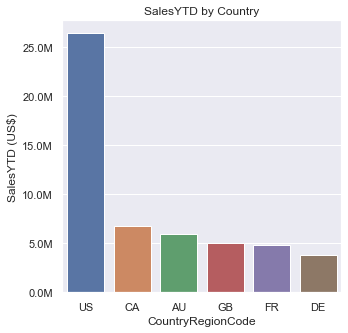

In [66]:
ax = sns.barplot(data=country_sales_group, x=country_sales_group.index,y='SalesYTD')
sns.set(rc={'figure.figsize':(5,5)})
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x * 1e-6)))
plt.title('SalesYTD by Country')
plt.ylabel('SalesYTD (US$)')


In [71]:
us_sales_group = country_sales[country_sales['CountryRegionCode']=='US']
us_sales_group = us_sales_group[['Name', 'SalesYTD']].groupby(['Name']).sum(['SalesYTD']).sort_values('SalesYTD', ascending=False)
us_sales_group.head()

,SalesYTD
Name,
Southwest,1.051085e+07
Northwest,7.887187e+06
Central,3.072175e+06
Southeast,2.538667e+06
Northeast,2.402177e+06


Text(0, 0.5, 'SalesYTD (US$)')

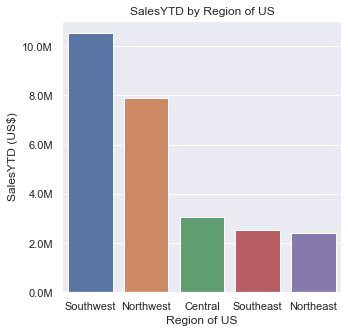

In [74]:
ax = sns.barplot(data=us_sales_group, x=us_sales_group.index,y='SalesYTD')
sns.set(rc={'figure.figsize':(5,5)})
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x * 1e-6)))
plt.title('SalesYTD by Region of US')
plt.xlabel('Region of US')
plt.ylabel('SalesYTD (US$)')

#### Conclusion:
1. The best performing country is USA, in which the total sale is much higher than other countries.
2. This indicates the market of the company is mainly in USA, further investigation is need to analyse the factors such as size of the population, access to the latest technology, or increased marketing efforts in the US.
3. From the SalesYTD chart, we can see differet Total sales in US of the year.

#### 2. What is the relationship between annual leave taken and bonus?

In [17]:
annualleave_bonus = pd.read_csv('e:\AdventureWorks\AnnualLeaveBonus_view.csv')
annualleave_bonus.head()

,BusinessEntityID,sum_vacationHours,sum_bonus
0,274,14,0
1,275,38,4100
2,276,27,2000
3,277,24,2500
4,278,33,500


Text(0, 0.5, 'Bouns (US)')

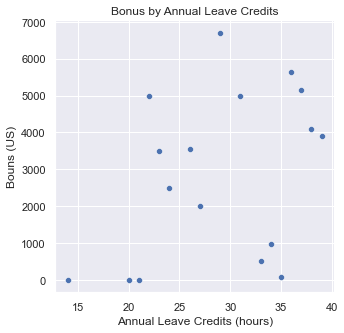

In [23]:
sns.scatterplot(data=annualleave_bonus, x='sum_vacationHours', y='sum_bonus')
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Bonus by Annual Leave Credits')
plt.xlabel('Annual Leave Credits (hours)')
plt.ylabel('Bouns (US)')

In [75]:
annualleave_bonus['sum_bonus'].corr(annualleave_bonus['sum_vacationHours'])
print('Between annual leave hours and bonus:')
print(f'correlation coefficent = {corr}')

Between annual leave hours and bonus:
correlation coefficent = 0.1336447778300006


#### Conclusion: 
1. The correlation coefficent is 0.38, so the relationship between annual leave credits and bonus is weak.
2. Assuming initial annual leave hours for each employee is the same, there is not significent relationship between annual leave taken with the employee's bonus.

#### 3. What is the relationship between Country and Revenue?

In [25]:
country_revenue=pd.read_csv('e:\AdventureWorks\CountryRevenue_view.csv')
country_revenue_sorted=country_revenue.sort_values('sum_annual_revenue', ascending=False)
country_revenue_sorted.head()

,sum_annual_revenue,CountryRegionCode
5,67360000,US
1,17960000,CA
4,6800000,GB
3,6650000,FR
0,6420000,AU


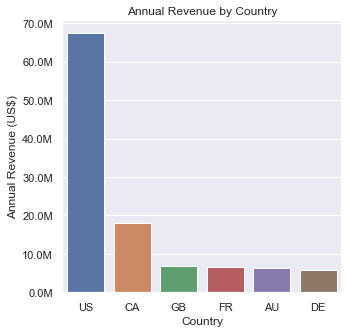

In [86]:
ax=sns.barplot(data=country_revenue_sorted, x='CountryRegionCode', y='sum_annual_revenue')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x * 1e-6)))
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Annual Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Annual Revenue (US$)')
plt.show()

#### What is the relationship between sick leave and Job Title (PersonType)?

In [83]:
annualleave_bonus = pd.read_csv('e:\AdventureWorks\AnnualLeaveBonus_view.csv')
annualleave_bonus.head()

,BusinessEntityID,sum_vacationHours,sum_bonus
0,274,14,0
1,275,38,4100
2,276,27,2000
3,277,24,2500
4,278,33,500


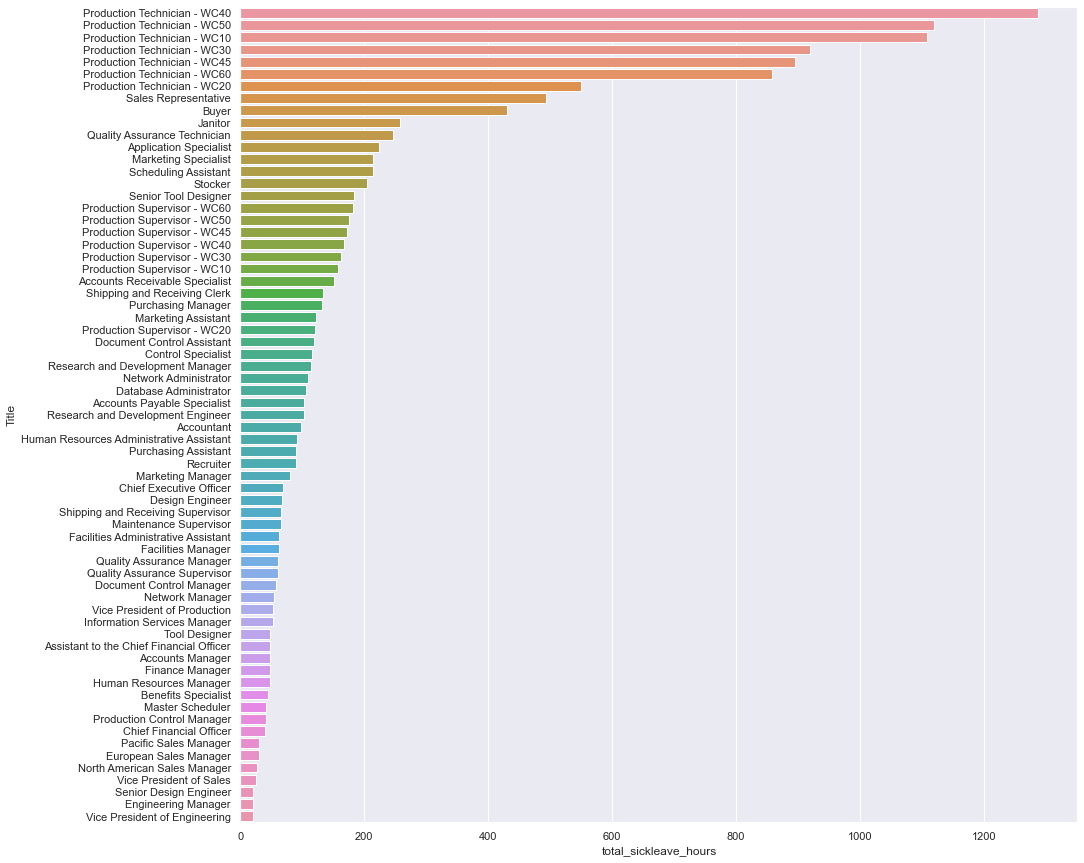

In [40]:
sns.barplot(data=sick_leave_title, y='Title', x='total_sickleave_hours')
sns.set(rc={'figure.figsize':(10,10)})

#### Discussion
1. Job titles with Production Technician have extremely more sick leave days than other titles, which might need further investigation.
2. Job titles with terms like manager, chief, president show up mostly in lower half of the plot, which indicate that senior roles have less sick leave days. 

#### 5. What is the relationship between store trading duration and revenue?

In [41]:
store_duration_revenue = pd.read_csv("e:\AdventureWorks\Store_view.csv")
store_duration_revenue.head()

,YearOpened,AnnualRevenue,SquareFeet,NumberEmployees
0,1996,80000,21000,13
1,1991,80000,18000,14
2,1999,80000,21000,15
3,1994,80000,18000,16
4,1987,80000,21000,17


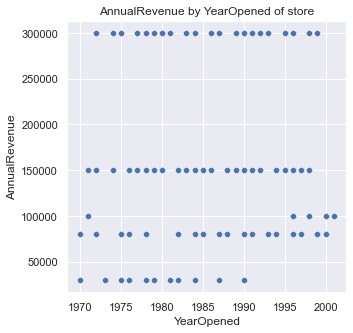

In [43]:
sns.scatterplot(data=store_duration_revenue, x='YearOpened', y='AnnualRevenue')
sns.set(rc={'figure.figsize':(5,5)})
plt.title('AnnualRevenue by YearOpened of store')
sns.set(rc={'figure.figsize':(5,5)})

In [76]:
corr = store_duration_revenue['YearOpened'].corr(store_duration_revenue['AnnualRevenue'])
print('Between annual revenue and store duration:')
print(f'correlation coefficent = {corr}')

Between annual revenue and store duration:
correlation coefficent = 0.1336447778300006


#### Conclusion: 
1. The correlation coefficent is 0.13, so the relationship between store duration and annual revenue is weak.
2. This indicate that the age of the store does not seem to have a meaningful impact on its revenue. 

#### 6. What is the relationship between the size of the stores, number of employees and revenue?

Text(0, 0.5, 'Annual Revenue')

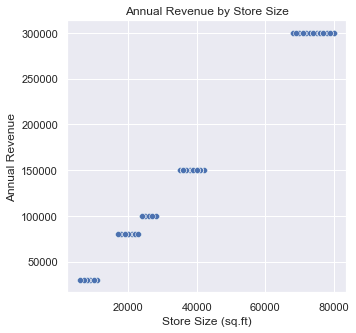

In [77]:
sns.scatterplot(data=store_duration_revenue, x='SquareFeet', y='AnnualRevenue')
plt.title('Annual Revenue by Store Size')
plt.xlabel('Store Size (sq.ft)')
plt.ylabel('Annual Revenue')

In [78]:
corr = store_duration_revenue['SquareFeet'].corr(store_duration_revenue['AnnualRevenue'])
print('Between revenue and store size:')
print(f'correlation coefficent = {corr}')

Between revenue and store size:
correlation coefficent = 0.9965308919435206


Text(0, 0.5, 'Annual Revenue')

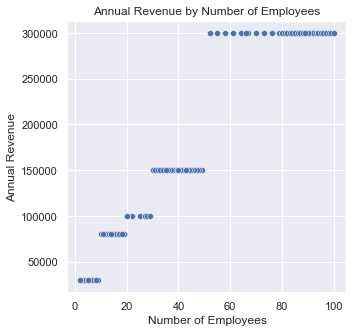

In [79]:
sns.scatterplot(data=store_duration_revenue, x='NumberEmployees', y='AnnualRevenue')
plt.title('Annual Revenue by Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Annual Revenue')

In [80]:
corr = store_duration_revenue['NumberEmployees'].corr(store_duration_revenue['AnnualRevenue'])
print('Between revenue and number of employees:')
print(f'correlation coefficent = {corr}')

Between revenue and number of employees:
correlation coefficent = 0.9581073442505244


Text(0, 0.5, 'Number of Employees')

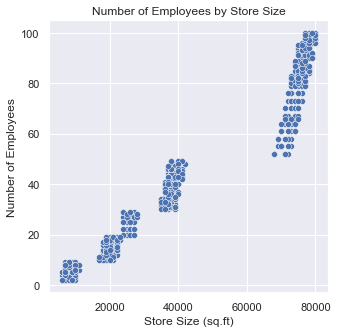

In [81]:
sns.scatterplot(data=store_duration_revenue, x='SquareFeet', y='NumberEmployees')
plt.title('Number of Employees by Store Size')
plt.xlabel('Store Size (sq.ft)')
plt.ylabel('Number of Employees')

In [82]:
corr = store_duration_revenue['NumberEmployees'].corr(store_duration_revenue['SquareFeet'])
print('Between revenue and number of employees:')
print(f'correlation coefficent = {corr}')

Between revenue and number of employees:
correlation coefficent = 0.9717822547114194


#### Discussion: 
1. The correlation coefficent between store size and annual revenue is 0.97, so the relationship between them is high.
2. The correlation coefficent between number of employees and annual revenue is 0.95, so the relationship between them is also high.
3. From the similar trend in two plot, we predict there is a strong positive relationship between store size and number of employees, which can be proved by correlation coefficent (0.97) between them as expected.

#### Conclusion:
So it is safe to say that when the store size increases, the number of employees and the annual avenue of the store also increase, and vice versa.